In [27]:
#set seeds for repoducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

Importing Dependenccies

In [28]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Data curation

In [29]:
!pip install kaggle

In [30]:
kaggle_credentails = json.load(open("kaggle.json"))

In [31]:
#setup kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [32]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [33]:
!ls

 kaggle.json  'plantvillage dataset'   plantvillage-dataset.zip   sample_data


In [34]:
#unzip dataset
with ZipFile("/content/plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [35]:
print(os.listdir("plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['grayscale', 'color', 'segmented']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']
38
['Corn_(maize)___Common_rust_', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Raspberry___healthy', 'Potato___Late_blight', 'Grape___Esca_(Black_Measles)']


Number of classes is 38

In [36]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy"))

423
['d966ee8e-abdc-4841-94a5-ae1bed9da16c___Mt.N.V_HL 9094.JPG', '4e7ca108-2631-452b-83bb-be0a7b32d98f___Mt.N.V_HL 6063.JPG', '8f2cf5e7-ee7e-4a6e-84d2-5ac4bdb2e33f___Mt.N.V_HL 6099.JPG', 'fe54a9e2-461a-457b-a391-f6e3cc99605c___Mt.N.V_HL 9093.JPG', '18830d61-997d-438c-bd24-4dd427a45c4d___Mt.N.V_HL 6123.JPG', '9466c0cc-2ae1-429e-b07e-eb75b94b2cf9___Mt.N.V_HL 9080.JPG', '9d78272e-303b-4fcc-af33-ff47d89a312d___Mt.N.V_HL 8959.JPG', 'abe2906e-bb00-466f-bf7c-72ef59a5ea82___Mt.N.V_HL 9062.JPG', 'feb2cf1a-1903-4fb8-bc99-4b399346fef0___Mt.N.V_HL 6135.JPG', 'fa8cd79e-82e1-4dda-9a82-6ce207f2b557___Mt.N.V_HL 9097.JPG', 'cdecb518-57f1-45f1-bfd6-bf97697215c2___Mt.N.V_HL 6037.JPG', '8bd312c9-5a9c-4ac7-ae60-cbc2600a23aa___Mt.N.V_HL 6128.JPG', '40802018-54d4-4be9-8dd3-0856e6dac368___Mt.N.V_HL 9050.JPG', '116c65e1-9d66-4aee-b151-6b8cd8319c2d___Mt.N.V_HL 9106.JPG', '49a5f0af-64f3-4d78-bff0-607bac0ad17a___Mt.N.V_HL 6048.JPG', '868c8ecd-f7dc-41c4-be99-237cf3d73c14___Mt.N.V_HL 6072.JPG', '345f02f4-0d5d-44cf

Data Pre-processing

In [37]:
#dataset path
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


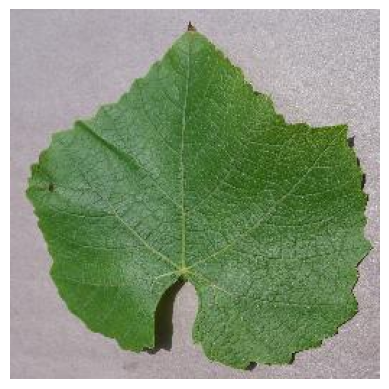

In [15]:
image_path = '/content/plantvillage dataset/color/Grape___healthy/d966ee8e-abdc-4841-94a5-ae1bed9da16c___Mt.N.V_HL 9094.JPG'

#Read the image
img = mpimg.imread(image_path)

print(img.shape)

#display image
plt.imshow(img)
#turn off axis number
plt.axis('off')
plt.show()

In [38]:
print(img)

[[[165 160 167]
  [168 163 170]
  [171 166 173]
  ...
  [193 188 194]
  [200 195 201]
  [200 195 201]]

 [[169 164 171]
  [171 166 173]
  [173 168 175]
  ...
  [190 185 191]
  [182 177 183]
  [172 167 173]]

 [[174 169 176]
  [175 170 177]
  [175 170 177]
  ...
  [201 196 202]
  [192 187 193]
  [180 175 181]]

 ...

 [[168 157 163]
  [168 157 163]
  [169 158 164]
  ...
  [149 138 142]
  [141 130 134]
  [141 130 134]]

 [[166 155 161]
  [169 158 164]
  [172 161 167]
  ...
  [161 150 154]
  [157 146 150]
  [157 146 150]]

 [[165 154 160]
  [170 159 165]
  [174 163 169]
  ...
  [163 152 156]
  [166 155 159]
  [168 157 161]]]


In [39]:
#immage parameters
img_size = 224
batch_size = 32

Train Test Split

In [40]:
#image data generators

data_gen = ImageDataGenerator(
    rescale = 1./233,
    validation_split = 0.2
 )

In [41]:
#train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
 )

Found 43456 images belonging to 38 classes.


In [42]:
#validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size = (img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


CNN model

In [43]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [45]:
#compile model
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

Model training

In [46]:
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size
)

Epoch 1/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 125s 90ms/step - accuracy: 0.5912 - loss: 1.7084 - val_accuracy: 0.8561 - val_loss: 0.4605
Epoch 2/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 95s 70ms/step - accuracy: 0.9107 - loss: 0.2806 - val_accuracy: 0.8613 - val_loss: 0.4339
Epoch 3/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 144s 72ms/step - accuracy: 0.9621 - loss: 0.1162 - val_accuracy: 0.8836 - val_loss: 0.4209
Epoch 4/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 138s 69ms/step - accuracy: 0.9771 - loss: 0.0689 - val_accuracy: 0.8752 - val_loss: 0.5045
Epoch 5/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 150s 74ms/step - accuracy: 0.9837 - loss: 0.0524 - val_accuracy: 0.8741 - val_loss: 0.5923
Epoch 6/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 74ms/step - accuracy: 0.9853 - loss: 0.0478 - val_accuracy: 0.8680 - val_loss: 0.6302
Epoch 7/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 89s 65ms/step - accuracy: 0.9872 - loss: 0.0426 - val_accuracy: 0.8650 - val_loss: 0.6817
Epoch 8/10
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 145s 67ms/step - accuracy: 0.

Model Evaluation

In [47]:
print("Evaluating model...")
val_loaa, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"validation accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
339/339 ━━━━━━━━━━━━━━━━━━━━ 15s 45ms/step - accuracy: 0.8711 - loss: 0.7946
validation accuracy: 87.26%


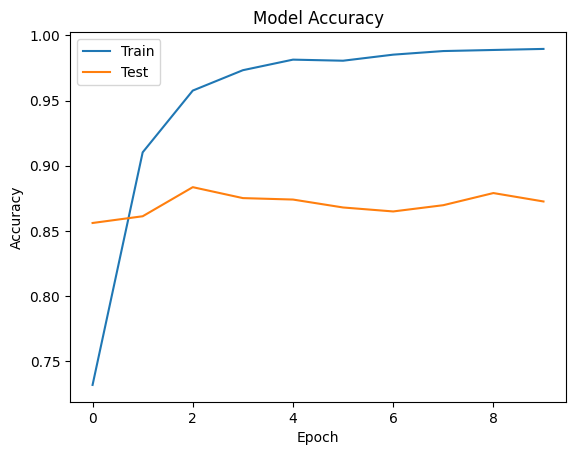

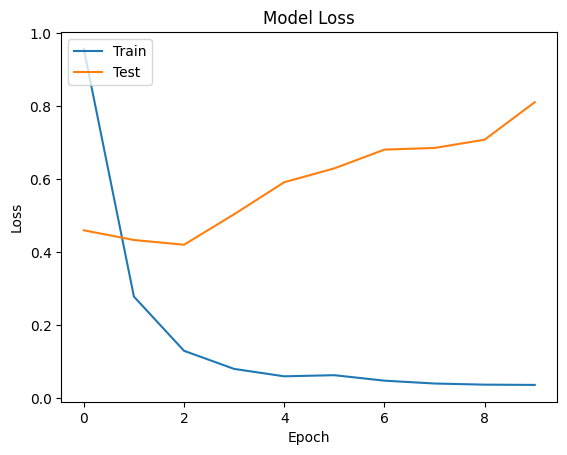

In [48]:
#plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Building a prediction system

In [49]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [50]:
#create a mapping from class indices to class name
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [51]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [52]:
#saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [53]:
#Example Usages
image_path = ''

print('Predicted Class Name: ', predict_class_name)

NameError: name 'predict_class_name' is not defined

Sive the model

In [55]:
model.save('plant_disease_prediction_model.h5')